# Pydy Tuesday 01-07-2025 - US Weekly Gas Prices data

### 1. Import Libraries

In [124]:
import sys
import pydytuesday
import pandas as pd
import numpy as np

# For Data Visualisation
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [125]:
# See version specifications of packages used (for reproducibility)
print("Python:", sys.version)
print("pandas:", pd.__version__)
print("numpy:", np.__version__)
print("matplotlib:", matplotlib.__version__)
print("seaborn:", sns.__version__)

Python: 3.12.3 (tags/v3.12.3:f6650f9, Apr  9 2024, 14:05:25) [MSC v.1938 64 bit (AMD64)]
pandas: 2.3.0
numpy: 1.26.4
matplotlib: 3.6.2
seaborn: 0.13.2


### 2. Load data and get familiar with the fields

In [ ]:
# Load data from the official tidytuesday repo
# Use date to fetch the files for that week
pydytuesday.get_date('2025-07-01')

Trying to fetch README from: https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/main/data/2025/2025-07-01/readme.md
Successfully fetched README from: https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/main/data/2025/2025-07-01/readme.md
Successfully saved meta.yaml to d:\SAUVIK\Projects\Pydy_Tuesdays\Pydy_01072025\meta.yaml
Successfully saved regular_gasoline_prices.png to d:\SAUVIK\Projects\Pydy_Tuesdays\Pydy_01072025\regular_gasoline_prices.png
Successfully saved weekly_gas_prices.csv to d:\SAUVIK\Projects\Pydy_Tuesdays\Pydy_01072025\weekly_gas_prices.csv


In [127]:
# Load dataset using Pandas 
weekly_gas_prices = pd.read_csv('weekly_gas_prices.csv')

In [128]:
# See data info
print(weekly_gas_prices.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22360 entries, 0 to 22359
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         22360 non-null  object 
 1   fuel         22360 non-null  object 
 2   grade        22360 non-null  object 
 3   formulation  19672 non-null  object 
 4   price        22360 non-null  float64
dtypes: float64(1), object(4)
memory usage: 873.6+ KB
None


In [129]:
# Set display width so that the details appear in a single line
pd.set_option('display.width', 1000)

# See sample records and statistical
# print("\n", weekly_gas_prices.describe())      # Shows only one numeric column
print("\n", weekly_gas_prices.describe(include='all'))   # Use 'all' to view all columns
print("\n Sample Records: \n", weekly_gas_prices.head())


               date      fuel  grade formulation         price
count        22360     22360  22360       19672  22360.000000
unique        1813         2      6           3           NaN
top     2008-02-11  gasoline    all         all           NaN
freq            15     19672   6506        6687           NaN
mean           NaN       NaN    NaN         NaN      2.582047
std            NaN       NaN    NaN         NaN      1.021566
min            NaN       NaN    NaN         NaN      0.885000
25%            NaN       NaN    NaN         NaN      1.575000
50%            NaN       NaN    NaN         NaN      2.646000
75%            NaN       NaN    NaN         NaN      3.389000
max            NaN       NaN    NaN         NaN      6.064000

 Sample Records: 
          date      fuel    grade   formulation  price
0  1990-08-20  gasoline  regular           all  1.191
1  1990-08-20  gasoline  regular  conventional  1.191
2  1990-08-27  gasoline  regular           all  1.245
3  1990-08-27  gas

In [ ]:
# See unique values for categorical fields
print("fuel: ", weekly_gas_prices['fuel'].unique())
print("grade: ", weekly_gas_prices['grade'].unique())
print("formulation: ", weekly_gas_prices['formulation'].unique())    # Formulation is applicable only to 'gasoline' fuel

fuel:  ['gasoline' 'diesel']
grade:  ['regular' 'all' 'midgrade' 'premium' 'ultra_low_sulfur' 'low_sulfur']
formulation:  ['all' 'conventional' nan 'reformulated']


### 3. Exploratory Data Analysis

In [ ]:
# Convert date to datetime format and extract year
weekly_gas_prices['date'] = pd.to_datetime(weekly_gas_prices['date'])
weekly_gas_prices['year'] = weekly_gas_prices['date'].dt.year


#### 3.a. Visualise Fuel Prices (Gasoline and Diesel) over the years

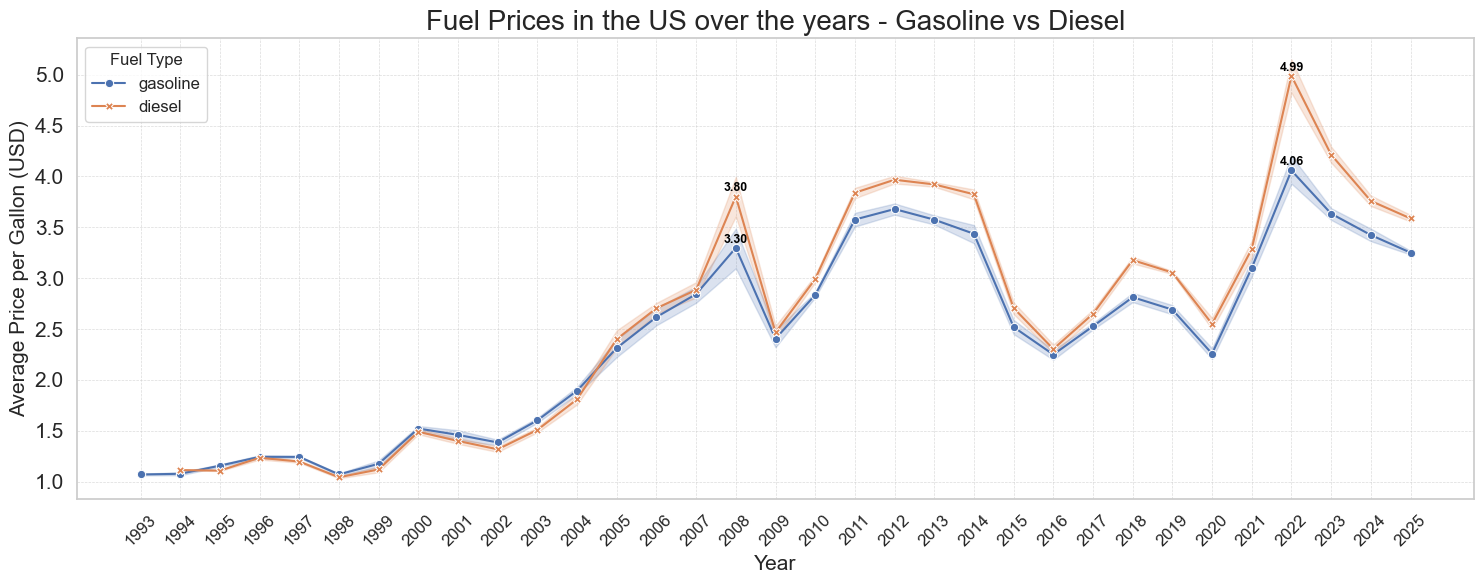

In [ ]:
# Gasoline and Diesel price trends over the years

# Filter gasoline data with grade and formulation values as 'all'
gasoline_df_all = weekly_gas_prices[
    (weekly_gas_prices['fuel'] == 'gasoline') &
    (weekly_gas_prices['grade'] == 'all') &
    (weekly_gas_prices['formulation'] == 'all')
]

# Filter diesel data with grade 'all' (formulation not applicable to diesel)
diesel_df_all = weekly_gas_prices[
    (weekly_gas_prices['fuel'] == 'diesel') &
    (weekly_gas_prices['grade'] == 'all')
]

# Combine the above two dataframes
combined = pd.concat([gasoline_df_all, diesel_df_all], ignore_index=True)

# Plot a lineplot to visualise price trends over the years
plt.figure(figsize=(15,6))
sns.lineplot(data=combined, x='year', y='price', hue='fuel', style='fuel', markers=True, dashes=False)

# Set Plot specifications
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.title("Fuel Prices in the US over the years - Gasoline vs Diesel", size=20)
plt.xlabel('Year', size=15)
# Show all the years in x-axis
years = sorted(combined['year'].unique())
plt.xticks(ticks=years, rotation=45, size=12)
yticks = np.arange(1.0, 5.1, 0.5)
plt.yticks(ticks=yticks, size=15)
plt.ylabel('Average Price per Gallon (USD)', size=15)
plt.legend(title='Fuel Type', loc='upper left', fontsize=12)

# Annotate for years which saw a price spike
spike_years = [2008, 2022]

for fuel_type in combined['fuel'].unique():
    temp = combined[(combined['fuel'] == fuel_type)]
    yearly_avg = temp.groupby('year')['price'].mean().reset_index()

    for _, row in yearly_avg.iterrows():
        if row['year'] in spike_years:
            plt.text(row['year'], row['price'] + 0.05, 
                     f"{row['price']:.2f}",
                     color='black', fontsize=9, fontweight='bold',
                     ha='center')
plt.tight_layout()
plt.show()

#### 3.b. Gasoline Prices by Grade (Regular, Midgrade, Premium) over the years

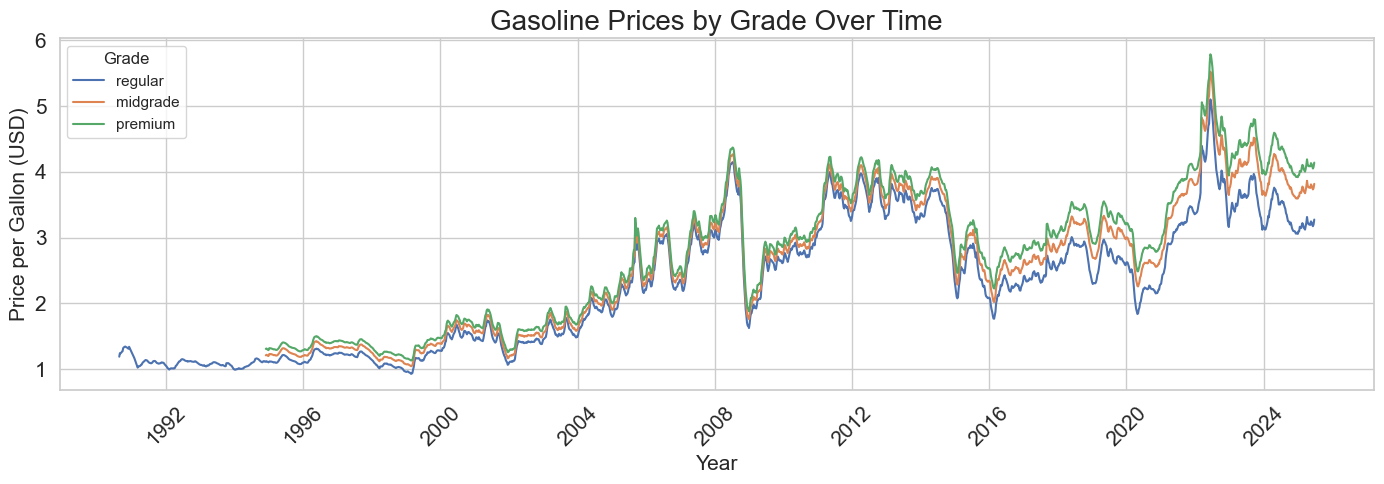

In [ ]:
# Filter only gasoline data
gasoline_df = weekly_gas_prices[weekly_gas_prices['fuel'] == 'gasoline'].copy()

# Keep only rows with specific grade and formulation (skip 'all' values)
gasoline_filtered = gasoline_df[
    (gasoline_df['grade'] != 'all') & 
    (gasoline_df['formulation'] != 'all')
]

# Calculate average price grouped by date and grade
grade_avg = gasoline_filtered.groupby(['date', 'grade'])['price'].mean().reset_index()

# Plot a lineplot
plt.figure(figsize=(14, 5))
sns.lineplot(data=grade_avg, x='date', y='price', hue='grade')

# Set plot specifications
plt.title("Gasoline Prices by Grade Over Time", size=20)
plt.xticks(rotation=45, size=15)
plt.yticks(size=15)
plt.ylabel("Price per Gallon (USD)", size=15)
plt.xlabel("Year", size=15)
plt.grid(True)
plt.legend(title='Grade')
plt.tight_layout()

# Display the plot
plt.show()


#### 3.c. Visualise Price Differences of 'Midgrade' and 'Premium' grades from 'Regular' Gasoline over the years

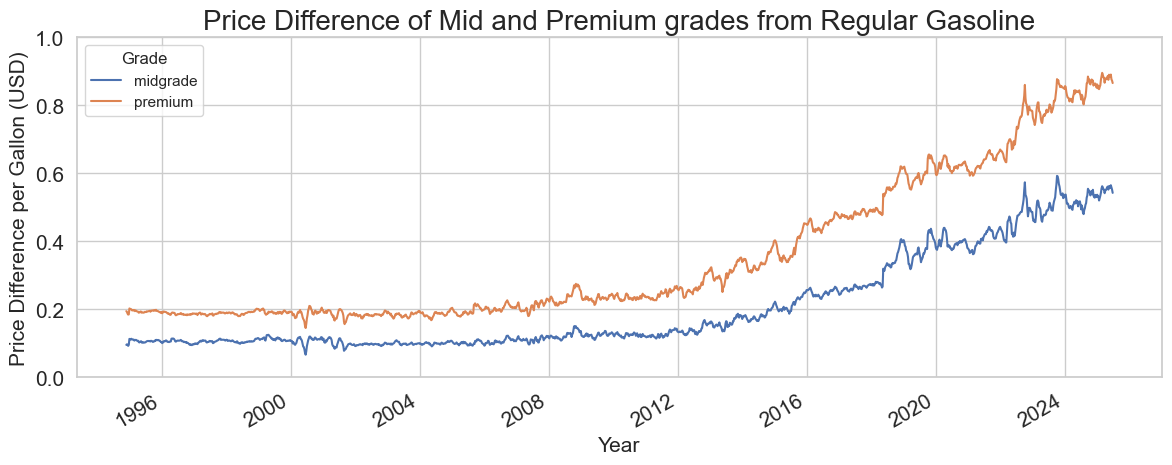

In [120]:
# Pivot table to get grades in columns
pivot = gasoline_filtered.pivot_table(index='date', columns='grade', values='price')

# Compute difference from regular
pivot_diff = pivot.sub(pivot['regular'], axis=0)

# Plot difference over time
pivot_diff[['midgrade', 'premium']].plot(figsize=(14, 5))
plt.title(label="Price Difference of Mid and Premium grades from Regular Gasoline", size=20)
plt.ylabel("Price Difference per Gallon (USD)", size=15)
plt.ylim(0,1)
plt.yticks(size=15)
plt.xlabel("Year", size=15)
plt.xticks(size=15)
plt.legend(title="Grade")
plt.grid(True)
plt.show()

#### 3.d. Detailed view of Average Gasoline Grade Prices by Year using a Heatmap

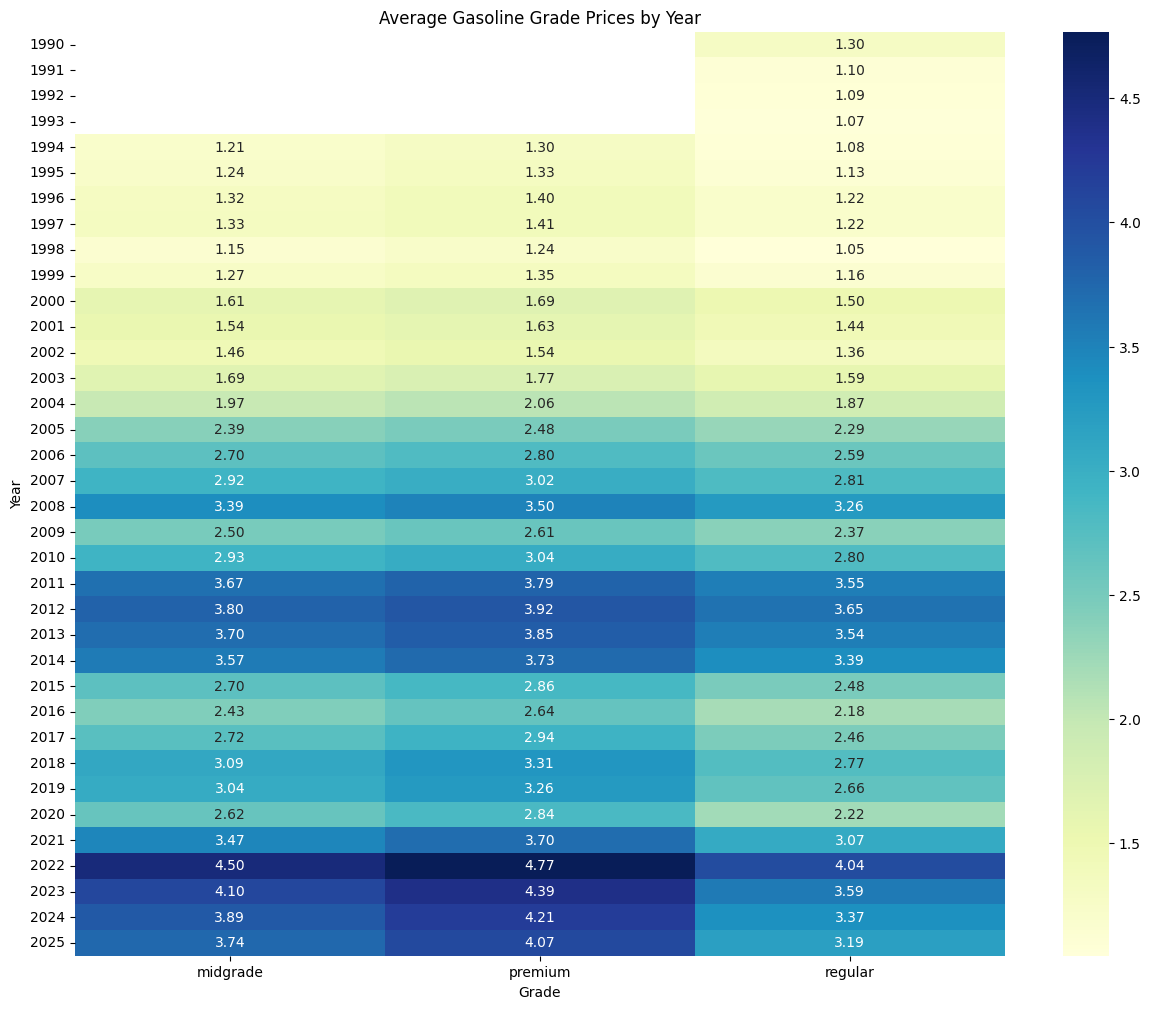

In [ ]:
# Gasoline data averaged and grouped by grade and year 
heat_data = gasoline_filtered.groupby([pd.to_datetime(gasoline_filtered['date']).dt.year, 'grade'])['price'].mean().unstack()

# Plot a heatmap
plt.figure(figsize=(15,12))
sns.heatmap(heat_data, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Average Gasoline Grade Prices by Year")
plt.ylabel("Year")
plt.xlabel("Grade")
plt.show()

#### 3.e. Gasoline Prices by Formulation (Conventional, Reformulated) over the years

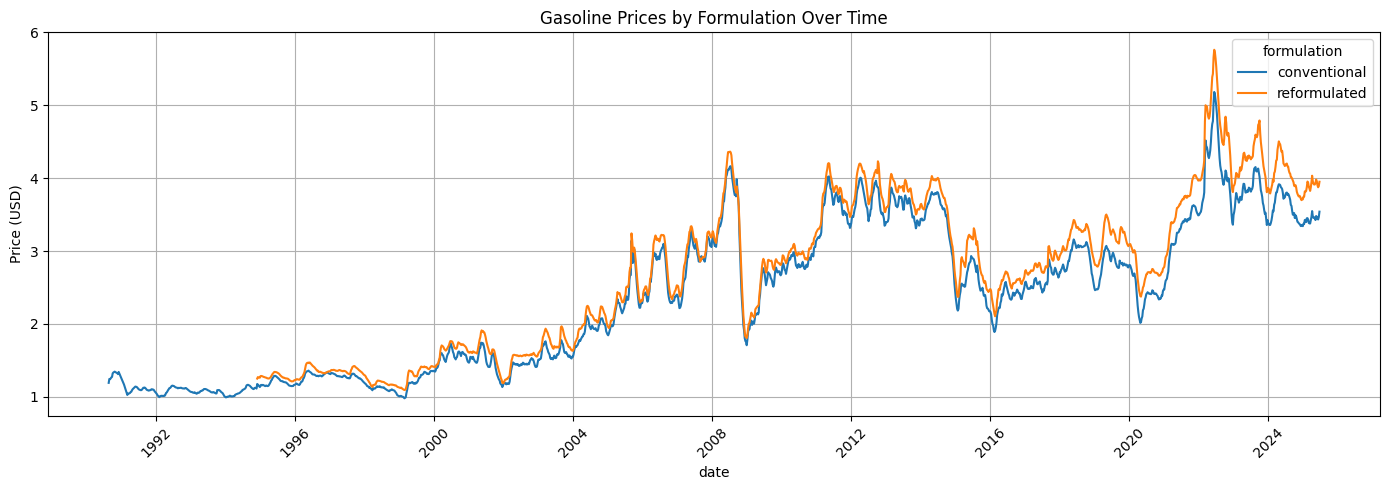

In [ ]:
# Gasoline data grouped by formulation
formulation_avg = gasoline_filtered.groupby(['date', 'formulation'])['price'].mean().reset_index()

# Plot a lineplot
plt.figure(figsize=(14, 5))
sns.lineplot(data=formulation_avg, x='date', y='price', hue='formulation')
plt.title("Gasoline Prices by Formulation Over Time")
plt.xticks(rotation=45)
plt.ylabel("Price (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()